# Marketing Capstone Project

##### Using 3 Different Machine learning Methods to predict Click Through Rate

### Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('/Users/theovl/Downloads')

In [3]:
df = pd.read_csv('data.csv')
info = pd.read_csv('Data+description+-+sheet1.csv')

In [4]:
info

,Variable,Description
0,click:,0/1 for non-click/click
1,"hour: format is YYMMDDHH, so 14091123 means 23...",NaN
2,C1,anonymized categorical variable
3,banner_pos,position of the ad/banner on the page
4,site_id,unique id of the site on which the ad is shown
5,site_domain,unique domain of the site on which the ad is s...
6,site_category,category of the site on which the ad is shown
7,app_id,app id of the site on which the ad is shown
8,app_domain,app category of the site on which the ad is shown
9,app_category,category id of the site on which the ad is shown


In [5]:
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [6]:
df.click.value_counts()

False    83019
True     16980
Name: click, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [8]:
df.columns.values

array(['click', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
       'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y'],
      dtype=object)

In [9]:
#Cleaing up columns that don't seem useful
df2  = df.drop(['dayofweek','day','hour'], axis = 1)

In [10]:
# Checking for null Values
df2.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
y                   0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

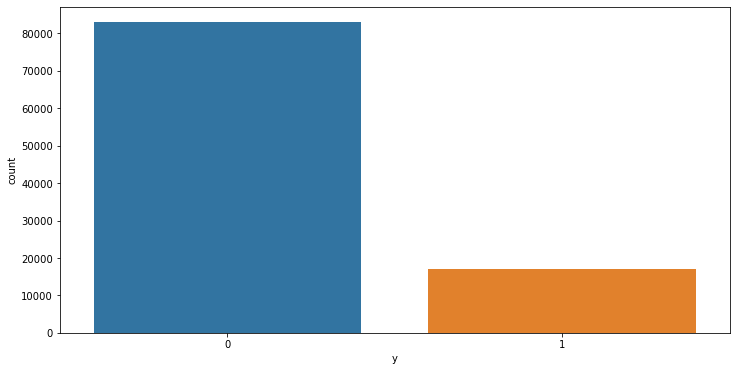

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(x='y', data = df2)

<AxesSubplot:xlabel='click', ylabel='count'>

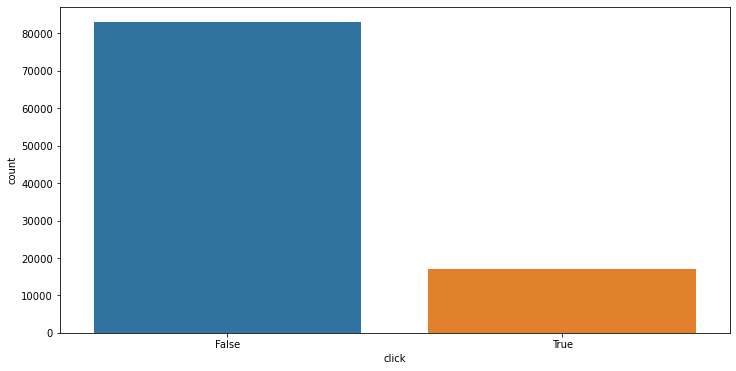

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(x='click', data = df2)

In [13]:
# eliminate duplicate outcome variable
df2 = df2.drop('y',axis = 1)

In [14]:
df2.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month'],
      dtype='object')

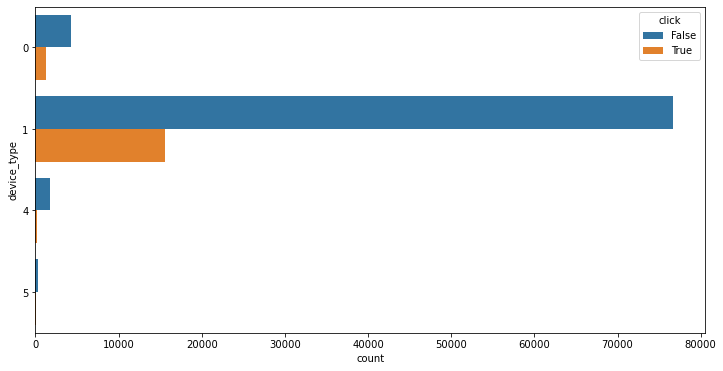

In [15]:
plt.figure(figsize = (12,6))
sns.countplot(y='device_type',data = df2, hue = 'click')
plt.show()

In [17]:
df2['click'] = df2.click.apply(lambda x: 1 if x == True else 0)

In [18]:
df2

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month
0,0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,22683,320,50,2528,0,39,100075,221,10
1,1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,17037,320,50,1934,2,39,-1,16,10
2,0,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,22155,320,50,2552,3,167,100202,23,10
3,0,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,0,21591,320,50,2478,3,167,100074,23,10
4,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,15708,320,50,1722,0,35,-1,79,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,17239,320,50,1973,3,39,100148,23,10
99995,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,22261,320,50,2545,0,167,100084,221,10
99996,1,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,...,0,21276,320,50,2443,2,39,-1,23,10
99997,1,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,...,0,20093,300,250,2295,2,35,100081,23,10


##### Converting Categorical variables into boolean dummy values

- To Prevent overloading our machine, we will only get dummy values for predictors with a small amount of unique variables. Otherwise we will consistently crash our Kernel.

- A large array of unique categorical values within each predictor typically means there is a smaller possibility that these predictors will give significant insights for our model


In [19]:
# populating L with all column names that have more than 20 unique variables
l = []
for i in df2.columns:
    if len(df2[i].unique()) > 20:
        l += [i]


In [20]:
# Not relevant (documenting categorical variables based on dtype)
object_type_data = df2.select_dtypes(include = 'object').columns

In [21]:
# Placeholder array
predictors = df2.drop('click', axis = 1).columns

 ##### converting all variables that don't fall under l into dummy variables

In [22]:
to_dummy_variables = df2.drop(l,axis =1).columns

In [23]:
df2 = df2.drop(l, axis = 1)

In [24]:
df2.dtypes

click                int64
C1                   int64
banner_pos           int64
site_category       object
device_type          int64
device_conn_type     int64
C15                  int64
C16                  int64
C18                  int64
month                int64
dtype: object

In [25]:
df2 = pd.get_dummies(data= df2, columns = to_dummy_variables, drop_first=True)

In [26]:
df2 = df2.rename({'click_1' : 'click'}, axis = 1)

In [27]:
df2

,click,C1_1002,C1_1005,C1_1007,C1_1008,C1_1010,C1_1012,banner_pos_1,banner_pos_2,banner_pos_3,...,C16_50,C16_90,C16_250,C16_320,C16_480,C16_768,C16_1024,C18_1,C18_2,C18_3
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
99995,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
99996,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
99997,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
X = df2.drop('click', axis = 1)
y = df2['click']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69999, 54)
(69999,)
(30000, 54)
(30000,)


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
coefficients = model.coef_

In [34]:
coefficients

array([[ 0.0078667 ,  0.05480188, -0.5982928 , -0.32124587, -0.56666406,
         0.43441874,  0.25764131,  1.13435769,  0.27176284, -0.19668971,
        -0.32124587,  1.43396731,  0.76036852, -0.3680458 ,  0.42473229,
         0.32095667,  0.2905667 , -0.04730253,  0.29105329, -0.27572004,
         0.10574238, -1.67997803, -0.50186661,  0.        , -0.42260868,
        -0.43986519,  2.01619929, -0.10878631,  0.32138481, -0.81647256,
        -0.44941926, -0.38585493, -0.18080914, -0.19312242, -0.48434919,
        -1.43680586, -0.22731333,  0.04859101,  0.16807831, -0.38324829,
        -0.38234285, -0.11274141,  0.35423158, -0.22731333, -0.407904  ,
        -0.38234285,  0.74346869, -0.38324829, -0.11889536,  0.35423158,
        -0.11274141, -1.15963912,  0.61560433,  0.02556706]])

0.8311
[[24896    21]
 [ 5046    37]]


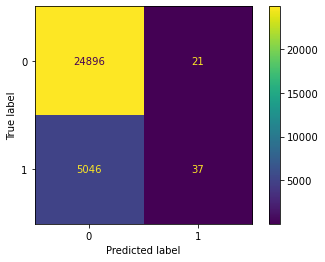

In [36]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

 **Although we have a high accuracy. The model is not actually providing valuable insights**

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.6425384094986818

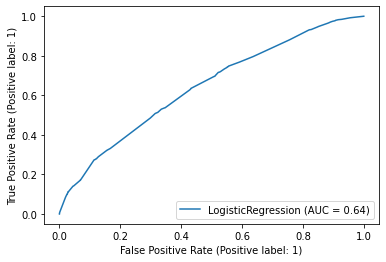

In [38]:
metrics.plot_roc_curve(model, X_test, y_test) 
plt.show()

### Feature Extraction Using RFE (model 2)

In [35]:
from sklearn.feature_selection import RFE

# Selecting an arbitrary amount of features for the next model
rfe = RFE(model, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [39]:
col = X_train.columns[rfe.support_]

In [40]:
col

Index(['C1_1007', 'banner_pos_2', 'banner_pos_7', 'site_category_335d28a8',
       'site_category_76b2941d', 'site_category_8fd0aea4',
       'site_category_a818d37a', 'site_category_c0dd3be3',
       'site_category_dedf689d', 'site_category_f66779e6',
       'device_conn_type_3', 'device_conn_type_5', 'C15_728', 'C16_250',
       'C18_1'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['C1_1002', 'C1_1005', 'C1_1008', 'C1_1010', 'C1_1012', 'banner_pos_1',
       'banner_pos_3', 'banner_pos_4', 'banner_pos_5',
       'site_category_28905ebd', 'site_category_3e814130',
       'site_category_42a36e14', 'site_category_50e219e0',
       'site_category_5378d028', 'site_category_70fb0e29',
       'site_category_72722551', 'site_category_75fa27f6',
       'site_category_9ccfa2ea', 'site_category_e787de0e',
       'site_category_f028772b', 'device_type_1', 'device_type_4',
       'device_type_5', 'device_conn_type_2', 'C15_216', 'C15_300', 'C15_320',
       'C15_480', 'C15_768', 'C15_1024', 'C16_36', 'C16_50', 'C16_90',
       'C16_320', 'C16_480', 'C16_768', 'C16_1024', 'C18_2', 'C18_3'],
      dtype='object')

In [42]:
import statsmodels.api as sm

In [44]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30747.
Date:                Sun, 08 Jan 2023   Deviance:                       61494.
Time:                        20:09:39   Pearson chi2:                 6.99e+04
No. Iterations:                    22   Pseudo R-squ. (CS):            0.03260
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.5823      0.011   -145.768      0.000      -1.604      -1.561
C1_1007                   -1.1644      0.730     -1.595      0.111      -2.595       0.266
banner_pos_2               1.8632      0.614      3.034      0.002       0.659       3.067
banner_pos_7               0.9326      0.265      3.520      0.000       0.413       1.452
site_category_335d28a8    -0.9004      0.216     -4.162      0.000      -1.324      -0.476
site_category_76b2941d    -2.5661      0.587     -4.372      0.000      -3.716      -1.416
site_category_8fd0aea4   -21.9838   2.29e+04     -0.001      0.999    -4.5e+04    4.49e+04
site_category_a818d37a   -22.5234   3.07e+04     -0.001      0.999   -6.02e+04    6.01e+04
site_category_c0dd3be3    -0.7759      0.396     -1.961      0.050      -1.551      -0.001
site_category_dedf689d     2.2191      0.319      6.956      0.000       1.594       2.844
site_category_f66779e6    -1.5548      0.242     -6.433      0.000      -2.029      -1.081
device_conn_type_3        -0.7702      0.083     -9.288      0.000      -0.933      -0.608
device_conn_type_5        -2.6020      1.012     -2.570      0.010      -4.586      -0.618
C15_728                   -1.2328      0.389     -3.167      0.002      -1.996      -0.470
C16_250                    1.3223      0.038     34.874      0.000       1.248       1.397
C18_1                     -1.3890      0.084    -16.511      0.000      -1.554      -1.224
==========================================================================================
"""

In [45]:
y_train_pred = res.predict(X_train_sm)
y_train_pred.value_counts()

1.704753e-01    59737
4.353675e-01     3009
2.316935e-02     2406
4.873946e-02     2136
8.687149e-02     1327
4.160380e-02      398
7.708357e-02      187
5.651554e-02      120
1.554444e-02      104
8.641975e-02       81
1.500456e-02       52
3.430548e-01       51
6.540364e-01       43
1.612413e-01       43
2.386000e-01       42
3.921226e-03       39
1.070686e-02       30
6.027396e-02       29
5.592956e-02       22
4.731793e-03       22
2.186000e-01       18
1.946781e-01       18
2.630514e-01       17
2.039849e-02       17
5.826215e-11       12
1.400600e-01        8
1.835208e-02        7
1.471446e-02        6
3.396437e-11        4
7.246635e-02        3
1.274329e-10        2
1.183914e-03        2
5.406409e-02        2
1.573939e-02        1
3.783485e-03        1
8.764363e-01        1
6.519960e-02        1
1.383838e-03        1
dtype: int64

In [46]:
y_train_pred_final = pd.DataFrame({'click':y_train, 'click_Prob':y_train_pred})
y_train_pred_final

,click,click_Prob
19755,0,0.170475
78590,0,0.170475
42068,0,0.086871
28438,0,0.170475
68764,0,0.170475
...,...,...
5695,1,0.170475
73542,0,0.170475
83281,0,0.170475
83467,0,0.170475


In [47]:
y_train_pred_final['predicted'] = y_train_pred_final.click_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,click,click_Prob,predicted
19755,0,0.170475,0
78590,0,0.170475,0
42068,0,0.086871,0
28438,0,0.170475,0
68764,0,0.170475,0


In [48]:
confusion = metrics.confusion_matrix(y_train_pred_final.click, y_train_pred_final.predicted)
print(confusion)

[[58087    15]
 [11868    29]]


In [49]:
metrics.accuracy_score(y_train_pred_final.click, y_train_pred_final.predicted)

0.8302404320061715

**Negligable Improvement**
- However we are predicting more clicks which is good

In [50]:
def model_evaluation(model, x_test, y_test, columns):
    X_sm = sm.add_constant(X_test[col])
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'click':y_test, 'click_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.click_Prob.map(lambda x: 1 if x > 0.5 else 0)
    print(metrics.accuracy_score(y_train_pred_final.click, y_train_pred_final.predicted))
    confusion_matrix = metrics.confusion_matrix(y_train_pred_final.click, y_train_pred_final.predicted)
    print(confusion_matrix)

In [51]:
model_evaluation(res, X_test, y_test, col)

0.8304
[[24907    10]
 [ 5078     5]]


**Lets find the optimal number of features by testing as many as we can**

In [52]:
for i in range(10, 55):
    rfe = RFE(model, n_features_to_select=i)
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_sm = sm.add_constant(X_train[col])
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print("\n\n")
    print(i)
    model_evaluation(res, X_test, y_test, col)




10
0.8304
[[24907    10]
 [ 5078     5]]



11
0.8304
[[24907    10]
 [ 5078     5]]



12
0.8304
[[24907    10]
 [ 5078     5]]



13
0.8304
[[24907    10]
 [ 5078     5]]



14
0.8304
[[24907    10]
 [ 5078     5]]



15
0.8304
[[24907    10]
 [ 5078     5]]



16
0.8304
[[24907    10]
 [ 5078     5]]



17
0.8304
[[24907    10]
 [ 5078     5]]



18
0.8304
[[24907    10]
 [ 5078     5]]



19
0.8304
[[24907    10]
 [ 5078     5]]



20
0.8304
[[24907    10]
 [ 5078     5]]



21
0.8303666666666667
[[24905    12]
 [ 5077     6]]



22
0.8303
[[24903    14]
 [ 5077     6]]



23
0.8303
[[24903    14]
 [ 5077     6]]



24
0.8303666666666667
[[24905    12]
 [ 5077     6]]



25
0.8303666666666667
[[24905    12]
 [ 5077     6]]



26
0.8302666666666667
[[24905    12]
 [ 5080     3]]



27
0.8271333333333334
[[24713   204]
 [ 4982   101]]



28
0.7875
[[23389  1528]
 [ 4847   236]]



29
0.8018333333333333
[[23263  1654]
 [ 4291   792]]



30
0.8117
[[23672  1245]
 [ 4404   679]]



3

Our model seems to be optimized at 52 features

In [53]:
rfe = RFE(model, n_features_to_select=52)           # running RFE with 26 variable output.
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
model_evaluation(res, X_test, y_test, col)

0.6
[[15379  9538]
 [ 2462  2621]]


Let us continue extract features with high VIF scores

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,C15_216,inf
48,C16_1024,inf
9,banner_pos_5,inf
39,C15_768,inf
3,C1_1010,inf
2,C1_1008,inf
47,C16_768,4.503600e+15
37,C15_480,3.216857e+14
40,C15_1024,9.898021e+13
46,C16_480,5.906360e+12


In [55]:
col

Index(['C1_1005', 'C1_1007', 'C1_1008', 'C1_1010', 'C1_1012', 'banner_pos_1',
       'banner_pos_2', 'banner_pos_3', 'banner_pos_4', 'banner_pos_5',
       'banner_pos_7', 'site_category_28905ebd', 'site_category_335d28a8',
       'site_category_3e814130', 'site_category_42a36e14',
       'site_category_50e219e0', 'site_category_5378d028',
       'site_category_70fb0e29', 'site_category_72722551',
       'site_category_75fa27f6', 'site_category_76b2941d',
       'site_category_8fd0aea4', 'site_category_a818d37a',
       'site_category_c0dd3be3', 'site_category_dedf689d',
       'site_category_e787de0e', 'site_category_f028772b',
       'site_category_f66779e6', 'device_type_1', 'device_type_4',
       'device_type_5', 'device_conn_type_2', 'device_conn_type_3',
       'device_conn_type_5', 'C15_216', 'C15_300', 'C15_320', 'C15_480',
       'C15_728', 'C15_768', 'C15_1024', 'C16_36', 'C16_50', 'C16_90',
       'C16_250', 'C16_320', 'C16_480', 'C16_768', 'C16_1024', 'C18_1',
       'C18_

In [78]:
d = {}
for a,b in zip(vif['Features'],vif['VIF']):
    if b <= 5:
        d[a] = b
optimized_predictors = pd.DataFrame(d, index = [0])
optimized_predictors.columns

Index(['site_category_c0dd3be3', 'site_category_dedf689d',
       'site_category_72722551', 'device_type_1', 'site_category_28905ebd',
       'site_category_70fb0e29', 'banner_pos_7', 'site_category_8fd0aea4',
       'site_category_a818d37a', 'device_conn_type_5',
       'site_category_42a36e14', 'banner_pos_2', 'site_category_e787de0e',
       'site_category_5378d028', 'banner_pos_3', 'banner_pos_4',
       'site_category_75fa27f6', 'site_category_f028772b', 'C1_1005',
       'device_conn_type_3', 'device_conn_type_2', 'banner_pos_1', 'C18_1',
       'C18_3', 'C18_2'],
      dtype='object')

In [80]:
col = optimized_predictors.columns

In [81]:
col

Index(['site_category_c0dd3be3', 'site_category_dedf689d',
       'site_category_72722551', 'device_type_1', 'site_category_28905ebd',
       'site_category_70fb0e29', 'banner_pos_7', 'site_category_8fd0aea4',
       'site_category_a818d37a', 'device_conn_type_5',
       'site_category_42a36e14', 'banner_pos_2', 'site_category_e787de0e',
       'site_category_5378d028', 'banner_pos_3', 'banner_pos_4',
       'site_category_75fa27f6', 'site_category_f028772b', 'C1_1005',
       'device_conn_type_3', 'device_conn_type_2', 'banner_pos_1', 'C18_1',
       'C18_3', 'C18_2'],
      dtype='object')

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

In [83]:
X_sm = sm.add_constant(X_test[col])
y_pred = res.predict(X_sm)
y_train_pred_final = pd.DataFrame({'click':y_test, 'click_Prob':y_pred})
y_train_pred_final['predicted'] = y_train_pred_final.click_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.click, y_train_pred_final.predicted))
confusion = metrics.confusion_matrix(y_train_pred_final.click, y_train_pred_final.predicted)
print(confusion)

0.8304
[[24907    10]
 [ 5078     5]]


### Optimizing our model based off of precision and recall (model 3)

- by adjusting the threshold probabilities of our model's predictions we can find the intersection of optimal recall, precision and accuracy

In [84]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.click_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,click,click_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
67780,0,0.113851,0,1,1,0,0,0,0,0,0,0,0
52878,1,0.189204,0,1,1,0,0,0,0,0,0,0,0
60644,0,0.189204,0,1,1,0,0,0,0,0,0,0,0
43620,0,0.113851,0,1,1,0,0,0,0,0,0,0,0
9912,0,0.152751,0,1,1,0,0,0,0,0,0,0,0


In [85]:
cutoff_df = pd.DataFrame(columns = ['Threshold Probability','accuracy','recall','precision'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.click, y_train_pred_final[i] )
    total =sum(sum(cm1))
    True_P = cm1[1,1]
    True_N = cm1[0,0]
    False_P = cm1[0,1]
    False_N = cm1[1,0]
    accuracy = (True_P + True_N)/total
    
    recall = True_P / (True_P+False_P)
    precision = True_P / (True_P+False_N)
    cutoff_df.loc[i] =[i, accuracy, recall, precision]
cutoff_df

,Threshold Probability,accuracy,recall,precision
0.0,0.0,0.169433,0.169433,1.000000
0.1,0.1,0.249933,0.180655,0.969309
0.2,0.2,0.759000,0.297185,0.309463
0.3,0.3,0.819967,0.285714,0.041708
0.4,0.4,0.830367,0.312500,0.000984
0.5,0.5,0.830400,0.333333,0.000984
0.6,0.6,0.830467,0.384615,0.000984
0.7,0.7,0.830600,1.000000,0.000197
0.8,0.8,0.830600,1.000000,0.000197
0.9,0.9,0.830567,NaN,0.000000


<AxesSubplot:xlabel='Threshold Probability', ylabel='accuracy'>

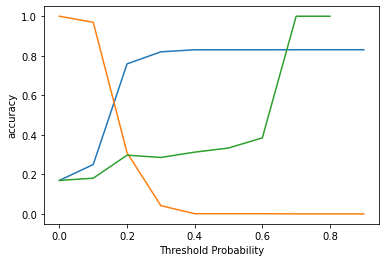

In [91]:
# plotting our results makes it easier to visualise
sns.lineplot(data = cutoff_df, x= 'Threshold Probability', y='accuracy') # Blue
sns.lineplot(data = cutoff_df, x= 'Threshold Probability',y= 'precision') # Orange
sns.lineplot(data = cutoff_df, x= 'Threshold Probability', y='recall') # Green

The optimal cutoff seems to be at 0.2

In [92]:
y_train_pred_final['predictions'] = y_train_pred_final.click_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,click,click_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predictions
67780,0,0.113851,0,1,1,0,0,0,0,0,0,0,0,0
52878,1,0.189204,0,1,1,0,0,0,0,0,0,0,0,0
60644,0,0.189204,0,1,1,0,0,0,0,0,0,0,0,0
43620,0,0.113851,0,1,1,0,0,0,0,0,0,0,0,0
9912,0,0.152751,0,1,1,0,0,0,0,0,0,0,0,0


In [93]:
metrics.accuracy_score(y_train_pred_final.click, y_train_pred_final.predictions)

0.759

In [94]:
print(metrics.confusion_matrix(y_train_pred_final.click, y_train_pred_final.predictions))

[[21197  3720]
 [ 3510  1573]]


### Insights

Out of the models we have built above. The best model we have created is the one that accounts for the highest accuracy, precision and recall.

- It is important to also account for the fact that high accuracy doesn't tell us much when we look at a one side leaning model anyway. in this case majority no-click.
- Although other models have higher accuracy, this model predicts many more iterations of click which is more significant to us than accurately predicting the lack of click through rate.